# Dota 2 Observers and Sentry Wards Data Exploration

## Observer Wards
- are purchasable, stackable consumables
- invisible watcher that gives **ground vision** (obstructed vision) in a 1600 radius to your team. Lasts 6 minutes.

https://dota2.fandom.com/wiki/Observer_Ward

## Sentry Wards
- are purchasable, stackable consumables
- invisible watcher that grants **True Sight** (detects invisibility), the ability to see invisible enemy units and wards, to any existing allied vision within a radius.
- Does not grant ground vision

https://dota2.fandom.com/wiki/Sentry_Ward

In [ ]:
{
    "obs_log": [
        {
            "time": -42,
            "type": "obs_log",
            "slot": 0,
            "x": 179.3,
            "y": 100.8,
            "z": 129,
            "entityleft": false,
            "ehandle": 7307646,
            "key": "[179,101]",
            "player_slot": 0
        }
    ],
    "sen_log": [
        {
            "time": -28,
            "type": "sen_log",
            "slot": 0,
            "x": 162,
            "y": 99.9,
            "z": 129,
            "entityleft": false,
            "ehandle": 13795721,
            "key": "[162,100]",
            "player_slot": 0
        }
    ]
}

In [ ]:
from tqdm import tqdm
import glob
import os
import json
from pprint import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# 19869/19869 [00:31<00:00, 639.50it/s]

coords_li = []
json_files = list(glob.iglob(os.path.join("..", "resources", "data", "*.json")))

for j in tqdm(json_files):
    with open(j, "r", encoding="utf-8") as fi:
        match = json.load(fi)

        for player in match["players"]:
            for obs in player["obs_log"]:
                coords_li.append({"match_id": match["match_id"], "hero_id": player["hero_id"], "rank_tier": player["rank_tier"], "time": obs["time"], "type": obs["type"], "x": obs["x"], "y": obs["y"]})
                
coords = pd.DataFrame(coords_li)

100%|██████████| 19869/19869 [00:31<00:00, 635.10it/s]


In [ ]:
coords.dropna(inplace=True)
coords["rank_group"] = (coords["rank_tier"] // 10).astype(int).astype("category")
print(coords.head())

# TODO filter by rank tier and relevant hero type


     match_id  hero_id  rank_tier  time     type      x      y rank_group
0  7861499456       64       55.0   -42  obs_log  179.3  100.8          5
1  7861499456       64       55.0   430  obs_log  188.2  115.9          5
2  7861499456       64       55.0   713  obs_log   82.3  174.6          5
3  7861499456       64       55.0   862  obs_log  115.6  182.3          5
4  7861499456       64       55.0   913  obs_log  124.0  131.6          5


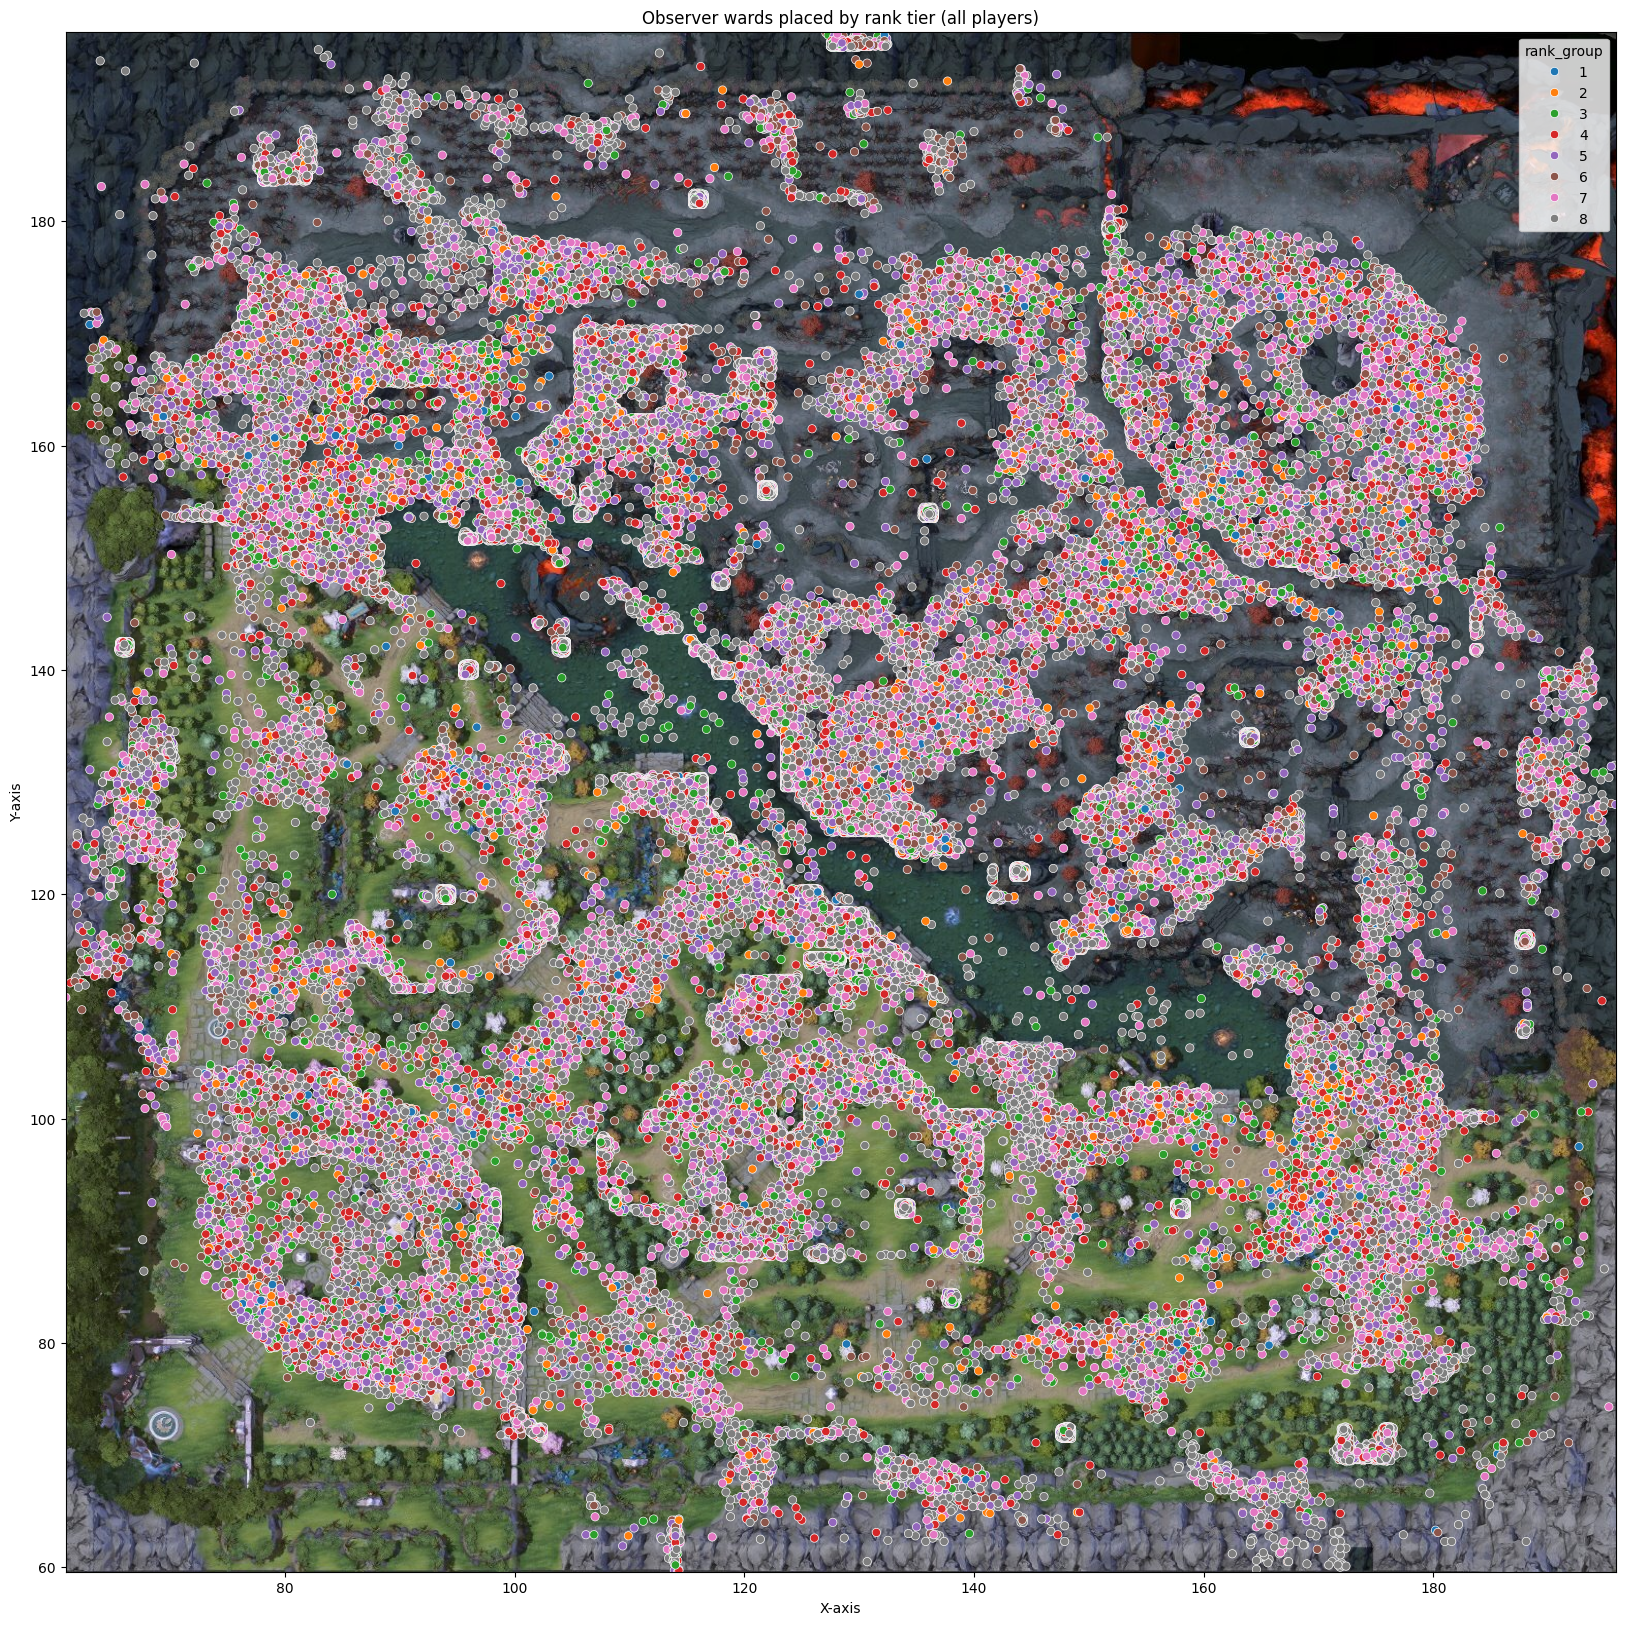

In [ ]:
dota_map = Image.open(os.path.join("..", "resources", "dota_map.jpg"))

fig, ax = plt.subplots(figsize=(20, 20))

# Image credits: https://washingtondccitymapminecraft.github.io/new-zprcp-the-battleground-of-legends-a-comprehensive-guide-to-the-dota-2-map-rmilp-pics/
ax.imshow(dota_map, extent=[min(coords['x']), max(coords['x']), min(coords['y']), max(coords['y'])], aspect='auto')

sns.scatterplot(x='x', y='y', hue='rank_group', data=coords, ax=ax)

ax.set_title('Observer wards placed by rank tier (all players)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()